In [5]:
#TAREA 03
#Importar bibliotecas

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
%matplotlib inline

import calendar

import folium
from folium import plugins
from folium.plugins import HeatMapWithTime

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
#Importación de datos

#Archivo de datos con columnas del DwC (https://dwc.tdwg.org/terms/)
archivo_datos = "datos/ara-ambiguus-cr.csv"

#Nombre científico que se desplegará en los gráficos estadísticos
nombre_cientifico = "Ara Ambiguus"

#Cantidad máxima de registros que se despliegan en un GeoDataFrame
pd.options.display.max_rows = 12

In [2]:
#Carga de datos en un DataFrame
registros_presencia_df = pd.read_csv(archivo_datos, sep='\t')
registros_presencia_df

#registros_presencia_df.head()
#registros_presencia_df.tail()

NameError: name 'archivo_datos' is not defined

In [5]:
#Graficación

#Estilo de los gráficos
plt.style.use('ggplot')

In [4]:
#Selección de un subconjunto de columnas
registros_presencia_df = registros_presencia_df[['species', 'stateProvince', 'locality', 'decimalLongitude', 'decimalLatitude', 'eventDate']]
registros_presencia_df

,species,stateProvince,locality,decimalLongitude,decimalLatitude,eventDate
0,Ara ambiguus,Alajuela,NaN,-84.311829,10.293973,2020-09-04T12:18:54
1,Ara ambiguus,Limón,NaN,-83.504336,10.485501,2019-04-19T15:31:00
2,Ara ambiguus,NaN,Costa Rica - Pococí,-83.661127,10.501265,2017-08-09T00:00:00
3,Ara ambiguus,NaN,Costa Rica - Tortuguero,-83.502708,10.537014,2019-01-26T00:00:00
4,Ara ambiguus,NaN,Costa Rica - Tortuguero NP,-83.513458,10.527702,2020-02-19T00:00:00
...,...,...,...,...,...,...
318,Ara ambiguus,NaN,Tortuga Lodge & Gardens,-83.519517,10.571319,2002-11-23T00:00:00
319,Ara ambiguus,NaN,Cerro Tortuguero,-83.526981,10.584467,2000-11-17T00:00:00
320,Ara ambiguus,NaN,Cerro Tortuguero,-83.526981,10.584467,2003-01-04T00:00:00
321,Ara ambiguus,NaN,Cerro Tortuguero,-83.526981,10.584467,2004-10-12T00:00:00


In [11]:
#Consulta del tipo de datos de una columna
registros_presencia_df.eventDate.dtypes

#Cambio del tipo de datos dateTime
registros_presencia_df["eventDate"] = pd.to_datetime(registros_presencia_df["eventDate"])

#Verificación del nuevo tipo de datos de la columna
registros_presencia_df.eventDate.dtypes

#Revisión del DataFrame para verificar la columna cambiada
registros_presencia_df


C:\Users\monse\anaconda3\envs\tarea-03-geopandas\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,species,stateProvince,locality,decimalLongitude,decimalLatitude,eventDate
0,Ara ambiguus,Alajuela,NaN,-84.311829,10.293973,2020-09-04 12:18:54
1,Ara ambiguus,Limón,NaN,-83.504336,10.485501,2019-04-19 15:31:00
2,Ara ambiguus,NaN,Costa Rica - Pococí,-83.661127,10.501265,2017-08-09 00:00:00
3,Ara ambiguus,NaN,Costa Rica - Tortuguero,-83.502708,10.537014,2019-01-26 00:00:00
4,Ara ambiguus,NaN,Costa Rica - Tortuguero NP,-83.513458,10.527702,2020-02-19 00:00:00
...,...,...,...,...,...,...
318,Ara ambiguus,NaN,Tortuga Lodge & Gardens,-83.519517,10.571319,2002-11-23 00:00:00
319,Ara ambiguus,NaN,Cerro Tortuguero,-83.526981,10.584467,2000-11-17 00:00:00
320,Ara ambiguus,NaN,Cerro Tortuguero,-83.526981,10.584467,2003-01-04 00:00:00
321,Ara ambiguus,NaN,Cerro Tortuguero,-83.526981,10.584467,2004-10-12 00:00:00


In [10]:
#Agrupación de los registros por mes
registros_x_mes = registros_presencia_df.groupby(registros_presencia_df['eventDate'].dt.month).count().eventDate

#Reemplazo del número del mes por el nombre del mes
registros_x_mes.index=[calendar.month_name[x] for x in range(1,13)]

registros_x_mes

January      46
February     49
March        37
April        24
May          22
June         30
July         41
August        7
September     5
October      14
November     25
December     22
Name: eventDate, dtype: int64

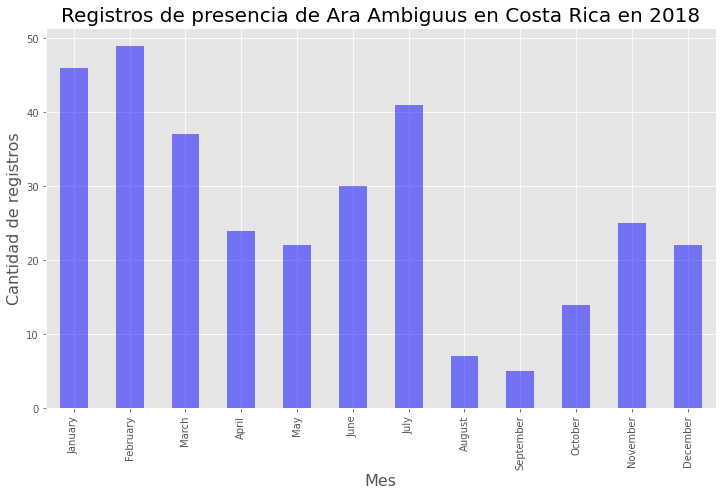

In [12]:
#Gráfico de barras
registros_x_mes.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

#Título y leyendas en los ejes
plt.title('Registros de presencia de ' + nombre_cientifico + ' en Costa Rica en 2018', fontsize=20)
plt.xlabel('Mes', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16);

In [19]:
#Gráfico por año

#Agrupación de los registros por mes
registros_x_ano = registros_presencia_df.groupby(registros_presencia_df['eventDate'].dt.year).count().eventDate

registros_x_ano


eventDate
1933.0     2
2000.0     1
2001.0     2
2002.0     2
2003.0     1
          ..
2016.0    38
2017.0    33
2018.0    52
2019.0    86
2020.0     9
Name: eventDate, Length: 19, dtype: int64

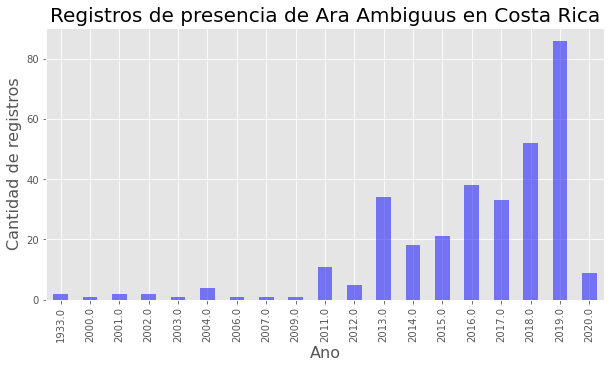

In [20]:
#Gráfico de barras
registros_x_ano.plot(kind='bar',figsize=(10,5), color='blue', alpha=0.5)

#Título y leyendas en los ejes
plt.title('Registros de presencia de ' + nombre_cientifico + ' en Costa Rica', fontsize=20)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16);

In [26]:
#Creación de mapa de registros de la especie

#Geodataframe
registros_presencia_geom = [Point(xy) for xy in zip(registros_presencia_df["decimalLongitude"], registros_presencia_df["decimalLatitude"])]
registros_presencia_gdf=gpd.GeoDataFrame(registros_presencia_df, crs={"init": "epsg:4326"}, geometry=registros_presencia_geom)


#Mapa centrado en Costa Rica
registros_presencia_mapa = folium.Map(location=[9.63, -84], zoom_start=8,control_scale=True)

#Mapeo de los puntos correspondientes a los registros de presencia
for lat, lng, label in zip(registros_presencia_df.decimalLatitude, registros_presencia_df.decimalLongitude, registros_presencia_df.eventDate.astype(str)):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='blue',
        fill=True,
        popup=label,
        fill_color='darkred',
        fill_opacity=0.6
    ).add_to(registros_presencia_mapa)
    
registros_presencia_mapa


C:\Users\monse\anaconda3\envs\tarea-03-geopandas\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [27]:
#Creación mapa de cluster

#Mapa centrado en Costa Rica
registros_presencia_mapa = folium.Map(location=[9.63, -84], zoom_start=8)

#Instantiate a mark cluster object for the car accidents
registros_presencia_cluster = plugins.MarkerCluster().add_to(registros_presencia_mapa)

for lat, lng, label in zip(registros_presencia_df.decimalLatitude, registros_presencia_df.decimalLongitude, registros_presencia_df.eventDate.astype(str)):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(registros_presencia_cluster)    
    
registros_presencia_mapa